# Netflix Movies and TV Shows

In [1]:
from IPython.display import Image
Image(url= "https://www.appdisqus.com/wp-content/uploads/2022/01/netflix-logo.jpg")

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Dataset column detail
- show_id : Unique ID for every Movie / Tv Show
- type : Identifier - A Movie or TV Show
- title : Title of the Movie / Tv Show
- director : Director of the Movie
- cast : Actors involved in the movie / show
- country : Country where the movie / show was produced
- date_added : Date it was added on Netflix
- release_year : Actual Release year of the move / show
- rating : TV Rating of the movie / show
- duration : Total Duration - in minutes or number of seasons

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import warnings 
warnings.filterwarnings("ignore")

## 1. Import the data

In [3]:
data = pd.read_csv('netflix_titles.csv')

## 2. Data Exploration

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.shape

(8807, 12)

There are 8807 rows and 12 columns in dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

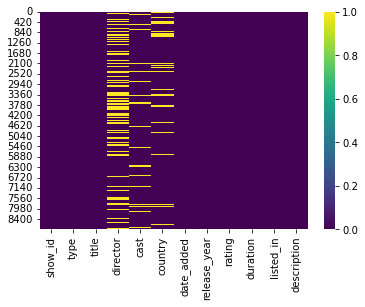

In [8]:
sns.heatmap(data.isnull(),cmap = 'viridis')

In [9]:
data.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

- There are missing values in column director, cast, country, date_added, rating and duration.
- We can't randomly fill the missing values in director and cast column,so we can let them NaN.
- Missing value in other column, we can fill them using mode and mean.

### 2.1 Handling missing values

In [10]:
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data['duration'] = data['duration'].fillna(data['duration'].mode()[0])

In [11]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2.2 Cleaning the data
Adding column
- Genre
- Month added
- Main country 

Editig rating column

#### 2.2.1 Category

In [12]:
#Rename the 'listed_in' column as 'category' for easy understanding
data = data.rename(columns={"listed_in":"category"})
data['category'] = data['category'].apply(lambda x: x.split(",")[0])
data['category'].head()

0             Documentaries
1    International TV Shows
2            Crime TV Shows
3                Docuseries
4    International TV Shows
Name: category, dtype: object

#### 2.2.2 Main country

In [13]:
data['country_main'] = data['country'].apply(lambda x: x.split(",")[0])
data['country_main'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: country_main, dtype: object

#### 2.2.3 rating

In [14]:
data.rating.value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [15]:
data['rating'] = data['rating'].replace({'TV-Y7-FV' : 'Other',
                                        'NC-17' : 'Other',
                                        'UR' : 'Other',
                                        '74 min' : 'Other',
                                        '84 min' : 'Other',
                                        '66 min' : 'Other',})

In [16]:
data.rating.value_counts()

TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
Other      15
Name: rating, dtype: int64

In [17]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,country_main
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,United States
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",United States
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,India


## 3. Exploratory Data Analysis¶


### 3.1 Movies vs TV Shows

In [18]:
data.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

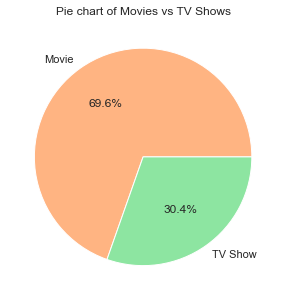

In [19]:
sns.set()
plt.figure(figsize=(12,5))
labels = ['Movie', 'TV Show']
colors = sns.color_palette('pastel')[1:5]
plt.pie(data.type.value_counts(), labels=labels, autopct="%.1f%%", colors=colors)
plt.title('Pie chart of Movies vs TV Shows')
plt.show()

There are more **Movie** on Netflix than **TV shows**.

### 3.2 Release year

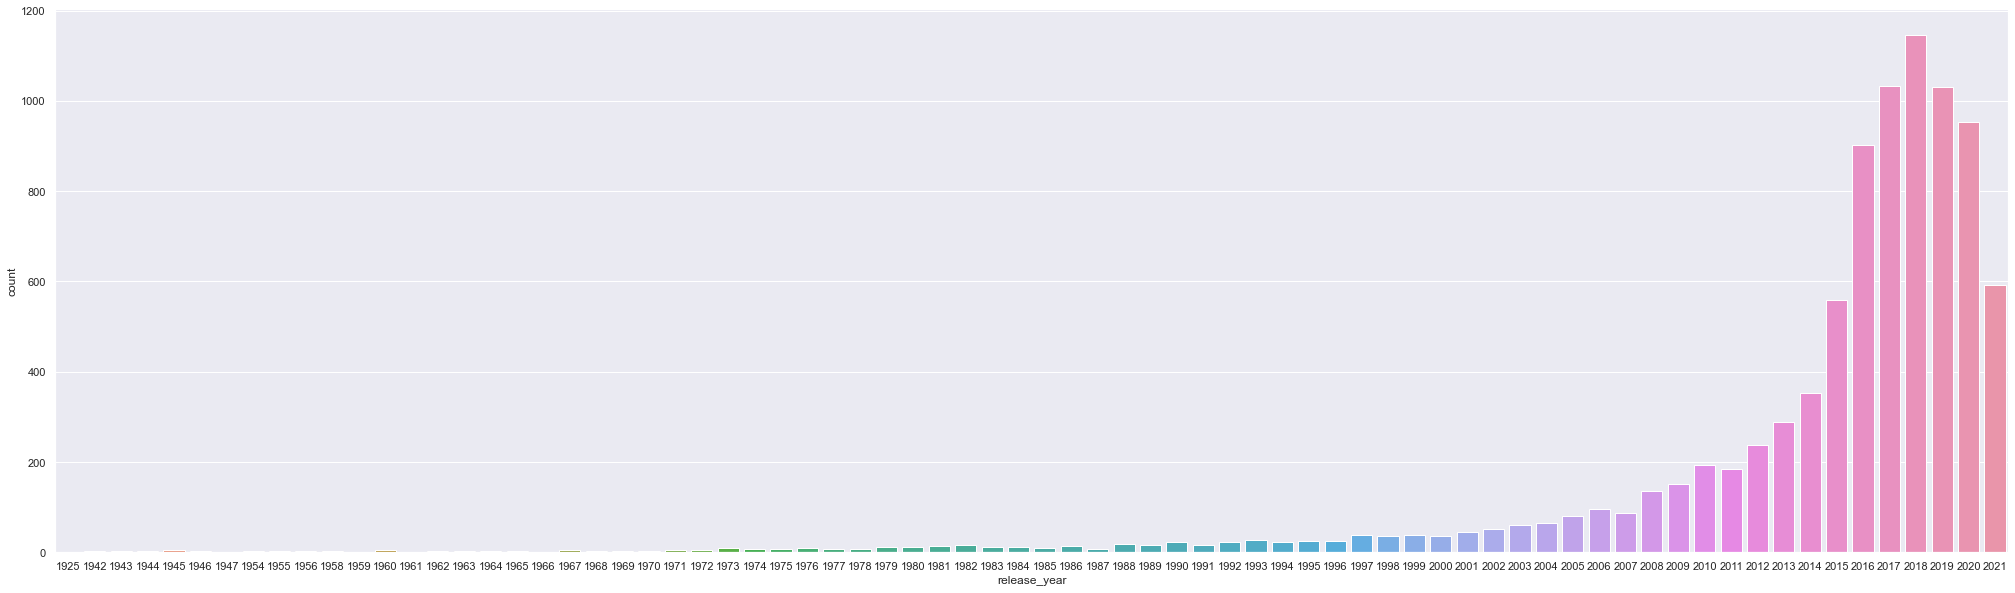

In [20]:
plt.figure(figsize = (35,10))
sns.countplot(x='release_year', data=data)
plt.show()

Most of the Movies and TV shows on Netflix are released in 2000s.

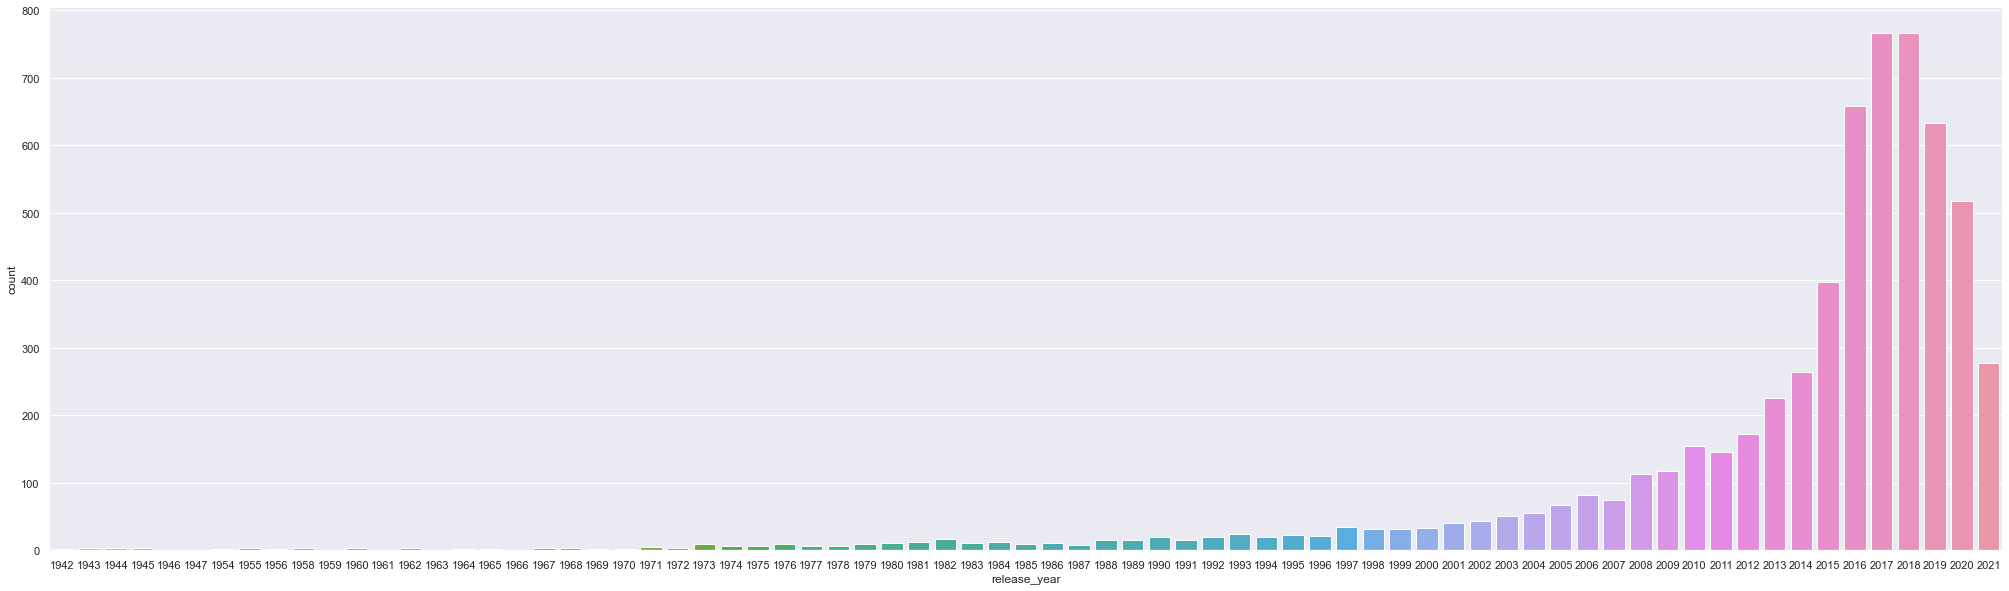

In [21]:
plt.figure(figsize = (35,10))
sns.countplot(x='release_year', data=data[data.type == 'Movie'])
plt.show()

The 10th oldest Movies on Netflix

In [22]:
data.loc[data.type == 'Movie',['title','release_year']].sort_values('release_year').head(10)

,title,release_year
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
7575,Nazi Concentration Camps,1945
7930,San Pietro,1945


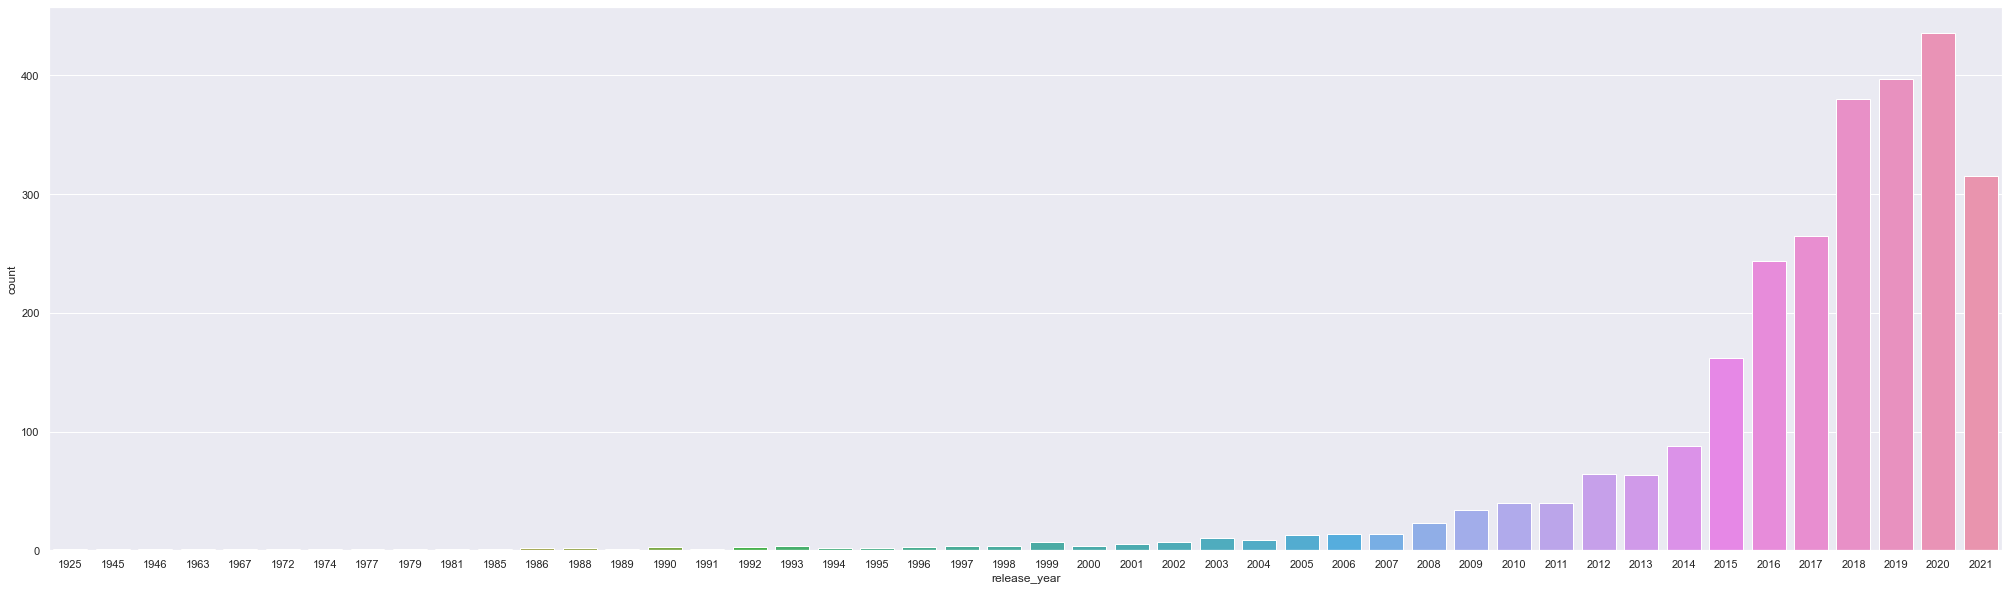

In [23]:
plt.figure(figsize = (35,10))
sns.countplot(x='release_year', data=data[data.type == 'TV Show'])
plt.show()

The 10th oldest Movies on Netflix

In [24]:
data.loc[data.type == 'TV Show',['title','release_year']].sort_values('release_year').head(10)

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
1331,Five Came Back: The Reference Films,1945
7743,Pioneers of African-American Cinema,1946
8541,The Twilight Zone (Original Series),1963
8189,The Andy Griffith Show,1967
4550,Monty Python's Fliegender Zirkus,1972
4551,Monty Python's Flying Circus,1974
6549,Dad's Army,1977
6674,El Chavo,1979
7588,Ninja Hattori,1981


### 3.3 Rating

In [25]:
data.rating.value_counts()

TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
Other      15
Name: rating, dtype: int64

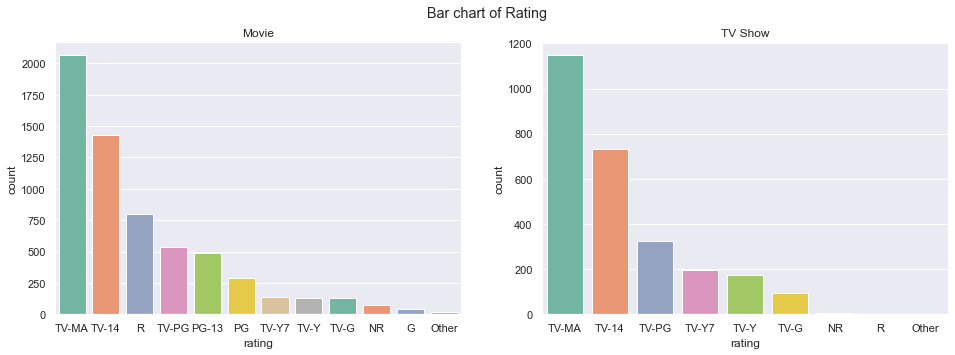

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))
fig.suptitle('Bar chart of Rating')

# Movie
sns.countplot(ax = axes[0], x='rating', data=data[data.type == 'Movie'], order=data[data.type == 'Movie'].rating.value_counts().index[0:], palette="Set2")
axes[0].set_title('Movie')

# TV Show
sns.countplot(ax = axes[1], x='rating', data=data[data.type == 'TV Show'], order=data[data.type == 'TV Show'].rating.value_counts().index[0:], palette="Set2")
axes[1].set_title('TV Show')

plt.show()

### 3.4 Duration

In [27]:
data['duration'] = data['duration'].apply(lambda x : x.split(' ')[0])
data['duration'] = data['duration'].astype('int')

3.4.1 Movie

In [28]:
data[data.type == 'Movie'].duration.value_counts()

90     152
94     146
93     146
97     146
91     144
      ... 
16       1
8        1
9        1
208      1
191      1
Name: duration, Length: 206, dtype: int64

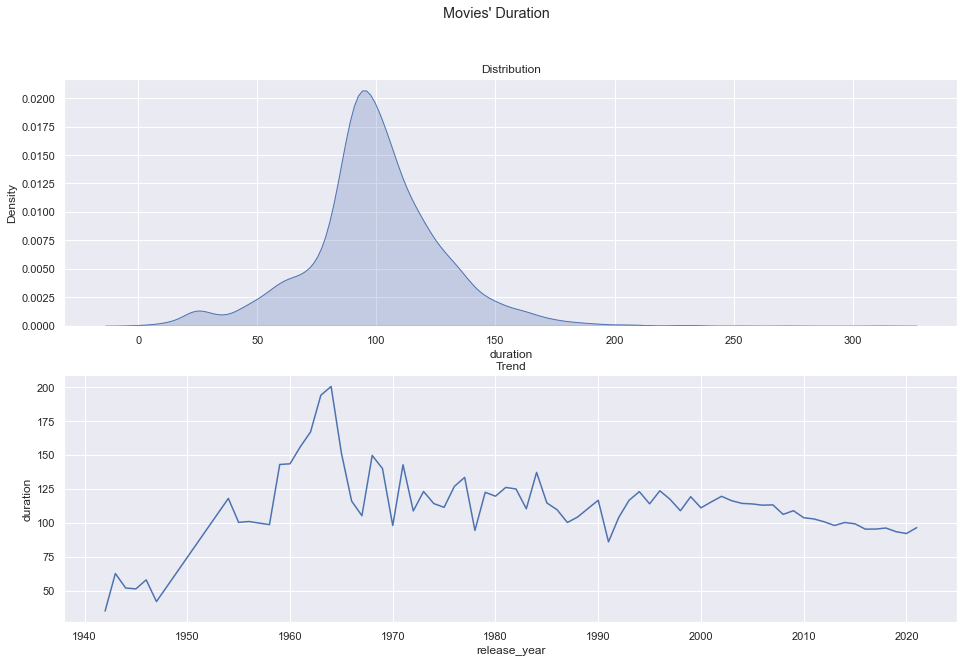

In [29]:
fig, axes = plt.subplots(2, 1, figsize = (16,10))
fig.suptitle("Movies' Duration")

# distribution
sns.kdeplot(ax = axes[0], x = 'duration', data=data[data.type == 'Movie'], shade = True)
axes[0].set_title('Distribution')

# trend
duration_year_movie = data[data.type == 'Movie'].groupby('release_year').mean()
sns.lineplot(ax = axes[1], x = duration_year_movie.index, y = duration_year_movie.duration)
axes[1].set_title('Trend')

plt.show()

Distribution
- The amount of Movies on Netflix are among the **duration between 70-120 mins**.

Trend
- In the years of **1960 - 1965**, Movies duration were **200 minutes**, **after 1965** the durations become **shorter**.
- From the year **1980**, trend of movie durations is consistent **between 100 - 50 minutes**.

3.4.1 TV Show

In [30]:
data[data.type == 'TV Show'].duration.value_counts()

1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
15       2
12       2
11       2
17       1
Name: duration, dtype: int64

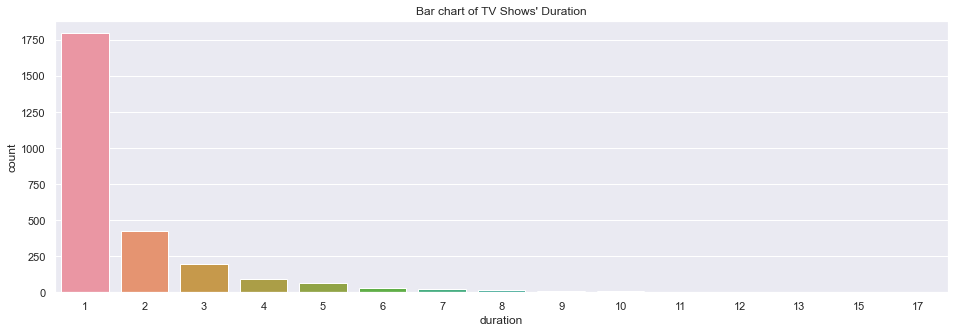

In [31]:
plt.figure(figsize = (16,5))
sns.countplot(x = 'duration', data=data[data.type == 'TV Show'])
plt.title("Bar chart of TV Shows' Duration")

plt.show()

Almost all of the TV Shows' Duration are **1, 2 and 3 seasons**.

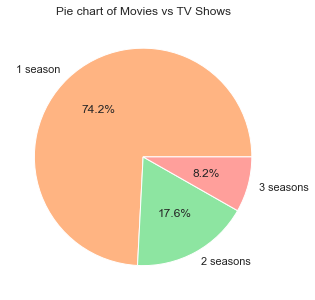

In [32]:
plt.figure(figsize = (5,5))
labels = ['1 season', '2 seasons', '3 seasons']
colors = sns.color_palette('pastel')[1:5]
plt.pie(data[data.type == 'TV Show'].duration.value_counts()[0:3], labels=labels, autopct="%.1f%%", colors=colors)
plt.title('Pie chart of Movies vs TV Shows')
plt.show()

In [33]:
data.loc[data.type == 'TV Show',['title','duration']].sort_values('duration', ascending=False).head(10)

,title,duration
548,Grey's Anatomy,17
2423,Supernatural,15
4798,NCIS,15
1354,Heartland,13
4220,COMEDIANS of the world,13
7847,Red vs. Blue,13
4964,Trailer Park Boys,12
5412,Criminal Minds,12
6795,Frasier,11
6456,Cheers,11


Top 3 Movies' Duration are Grey's Anatomy, Supernatural and NCIS repectively.

#### 3.4.1 Trend 

### 3.5 Category

In [34]:
# Movie
data[data.type == 'Movie']['category'].value_counts()

Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
Children & Family Movies     605
Stand-Up Comedy              334
Horror Movies                275
International Movies         128
Classic Movies                80
Thrillers                     65
Movies                        57
Anime Features                21
Independent Movies            20
Music & Musicals              18
Sci-Fi & Fantasy              13
Cult Movies                   12
Romantic Movies                3
LGBTQ Movies                   1
Sports Movies                  1
Name: category, dtype: int64

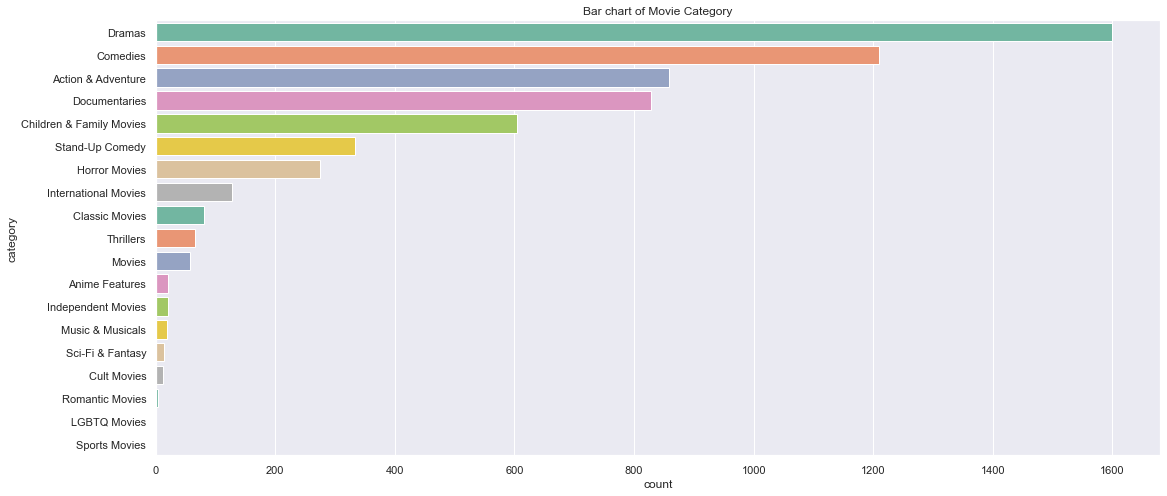

In [35]:
plt.figure(figsize = (18,8))
sns.countplot(y = 'category', data = data[data.type == 'Movie'], order=data[data.type == 'Movie'].category.value_counts().index[0:], palette="Set2")
plt.title('Bar chart of Movie Category')

plt.show()

Top 5 Movie Categoties on Netflix are **Dramas, Comedies, Action & Adventure, Documentaries and Children & Family Movies** repectively.

In [36]:
# TV Show
data[data.type == 'TV Show']['category'].value_counts()

International TV Shows          774
Crime TV Shows                  399
Kids' TV                        388
British TV Shows                253
Docuseries                      221
Anime Series                    176
TV Comedies                     120
Reality TV                      120
TV Dramas                        67
TV Action & Adventure            40
Stand-Up Comedy & Talk Shows     34
Romantic TV Shows                32
Classic & Cult TV                22
TV Shows                         16
TV Horror                        11
Spanish-Language TV Shows         2
TV Sci-Fi & Fantasy               1
Name: category, dtype: int64

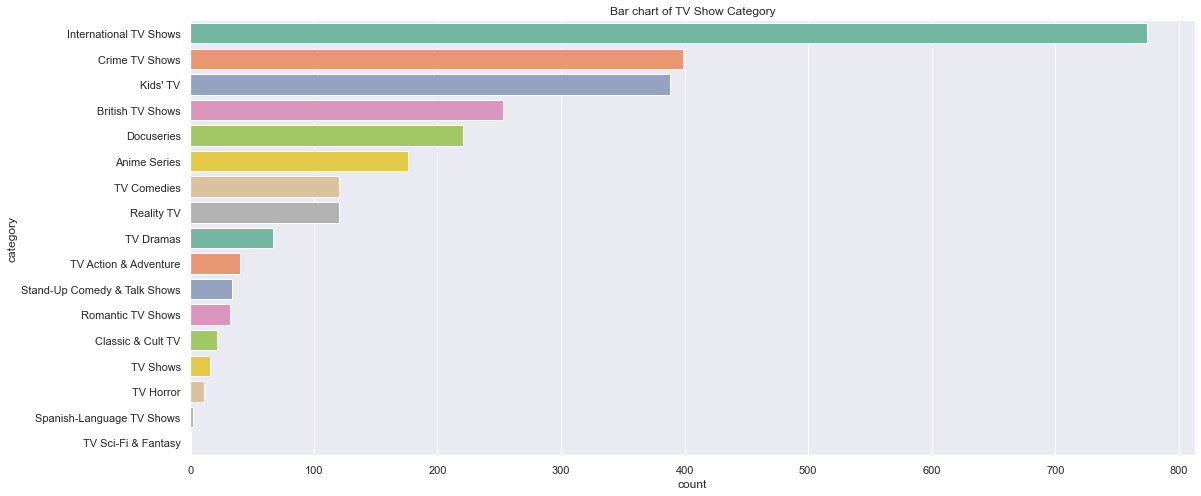

In [37]:
plt.figure(figsize = (18,8))
sns.countplot(y = 'category', data = data[data.type == 'TV Show'], order=data[data.type == 'TV Show'].category.value_counts().index[0:], palette="Set2")
plt.title('Bar chart of TV Show Category')

plt.show()

Top 5 TV Show Categoties on Netflix are **International TV Shows, Crime TV Shows, Kids'TV, British TV Shows and Docuseries** repectively.

### 3.6 Country

In [38]:
# Movie
data[data.type == 'Movie']['country_main'].value_counts().head(15)

United States     2804
India              927
United Kingdom     382
Canada             187
France             148
Spain              129
Egypt               98
Nigeria             87
Mexico              86
Japan               85
Indonesia           83
Turkey              81
Germany             78
Philippines         77
Hong Kong           76
Name: country_main, dtype: int64

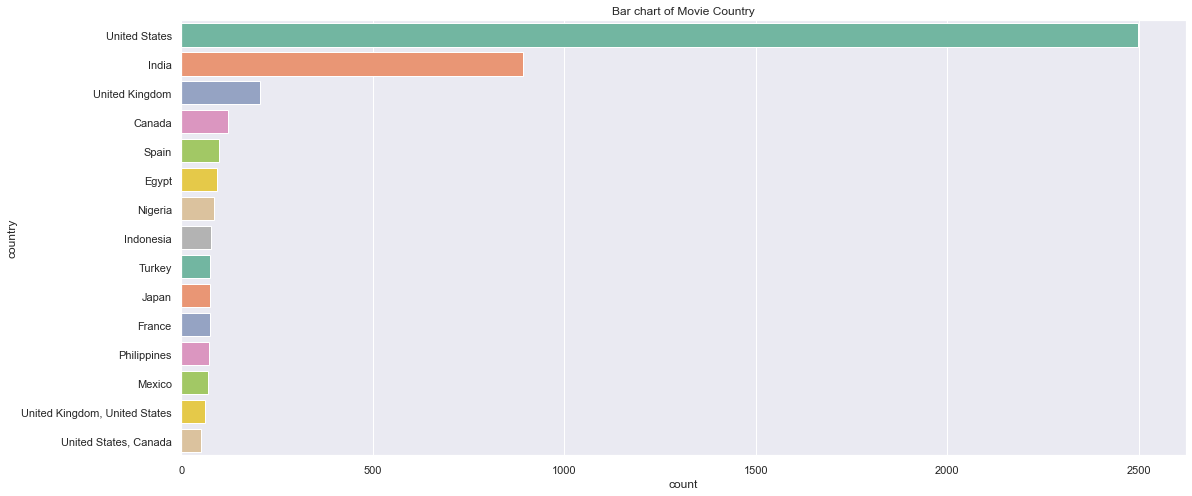

In [39]:
plt.figure(figsize = (18,8))
sns.countplot(y = 'country', data = data[data.type == 'Movie'], 
              order=data[data.type == 'Movie'].country.value_counts().index[0:15], palette="Set2")
plt.title('Bar chart of Movie Country')

plt.show()

Top 3 Movie countries are **United States, India and United Kingdom** repectively.

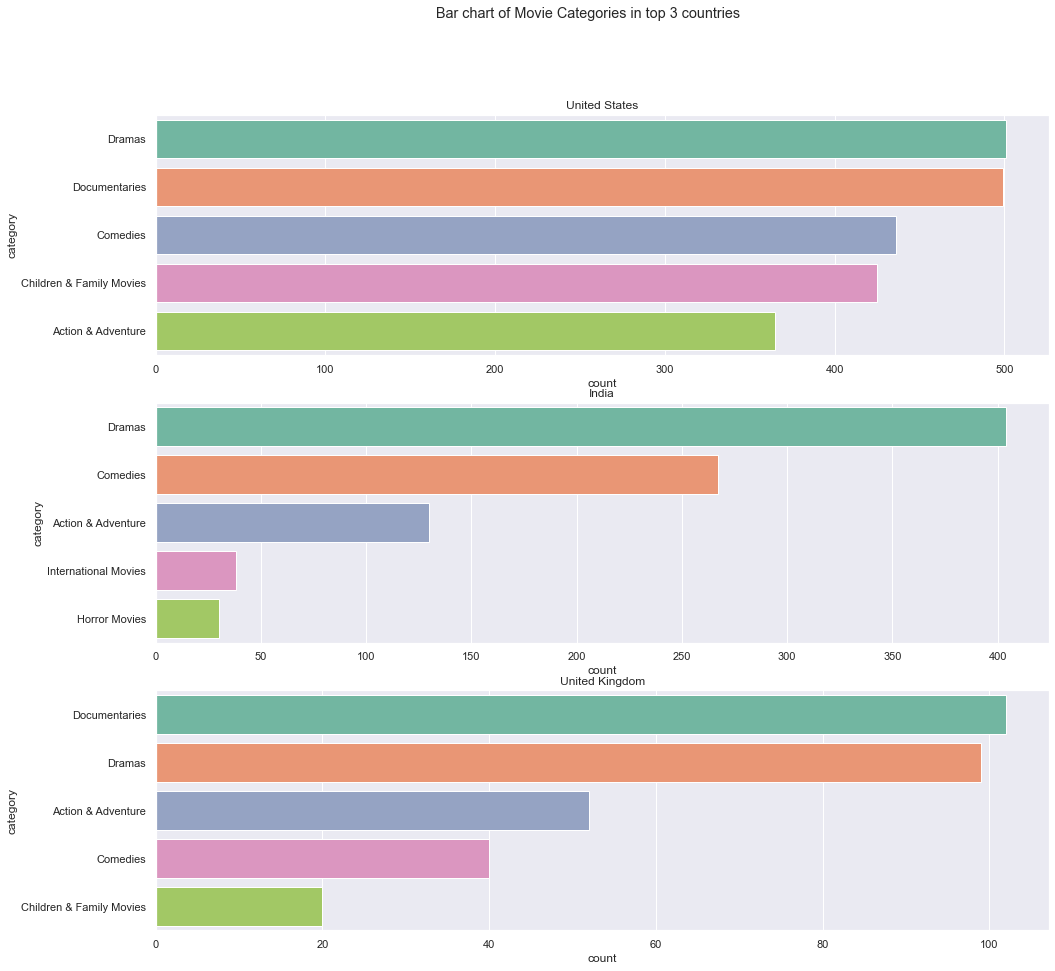

In [40]:
fig, axes = plt.subplots(3, 1, figsize = (16,15))
fig.suptitle('Bar chart of Movie Categories in top 3 countries')

datam = data[(data.type == 'Movie')]

# United States
sns.countplot(ax = axes[0], y = 'category', data = datam[datam.country_main == 'United States'], 
              order=datam[datam.country_main == 'United States'].category.value_counts().index[0:5], palette="Set2")
axes[0].set_title('United States')

# India
sns.countplot(ax = axes[1], y = 'category', data = datam[datam.country_main == 'India'], 
              order=datam[datam.country_main == 'India'].category.value_counts().index[0:5], palette="Set2")
axes[1].set_title('India')

# United Kingdom
sns.countplot(ax = axes[2], y = 'category', data = datam[data.country_main == 'United Kingdom'], 
              order=datam[datam.country_main == 'United Kingdom'].category.value_counts().index[0:5], palette="Set2")
axes[2].set_title('United Kingdom')

plt.show()

As we can see, The top 2 of categories, Damas and Documetaries, were produced in United states and United Kingdom,but in india, instead of Documetaries, Comedian is the one of the categories' top 2.

In [41]:
# TV Show
data[data.type == 'TV Show']['country_main'].value_counts().head(15)

United States     1238
United Kingdom     246
Japan              174
South Korea        164
Canada              84
India               81
Taiwan              70
France              64
Australia           56
Spain               52
Mexico              48
China               41
Turkey              30
Brazil              28
Colombia            25
Name: country_main, dtype: int64

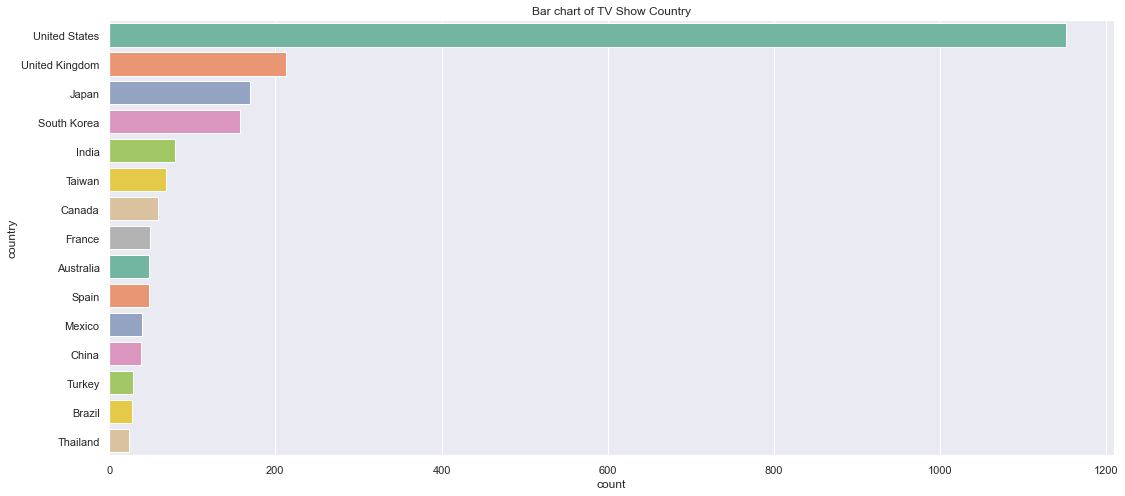

In [42]:
plt.figure(figsize = (18,8))
sns.countplot(y = 'country', data = data[data.type == 'TV Show'], 
              order=data[data.type == 'TV Show'].country.value_counts().index[0:15], palette="Set2")
plt.title('Bar chart of TV Show Country')

plt.show()

Top 3 Movie countries are **United States, United Kingdom and Japan** repectively.

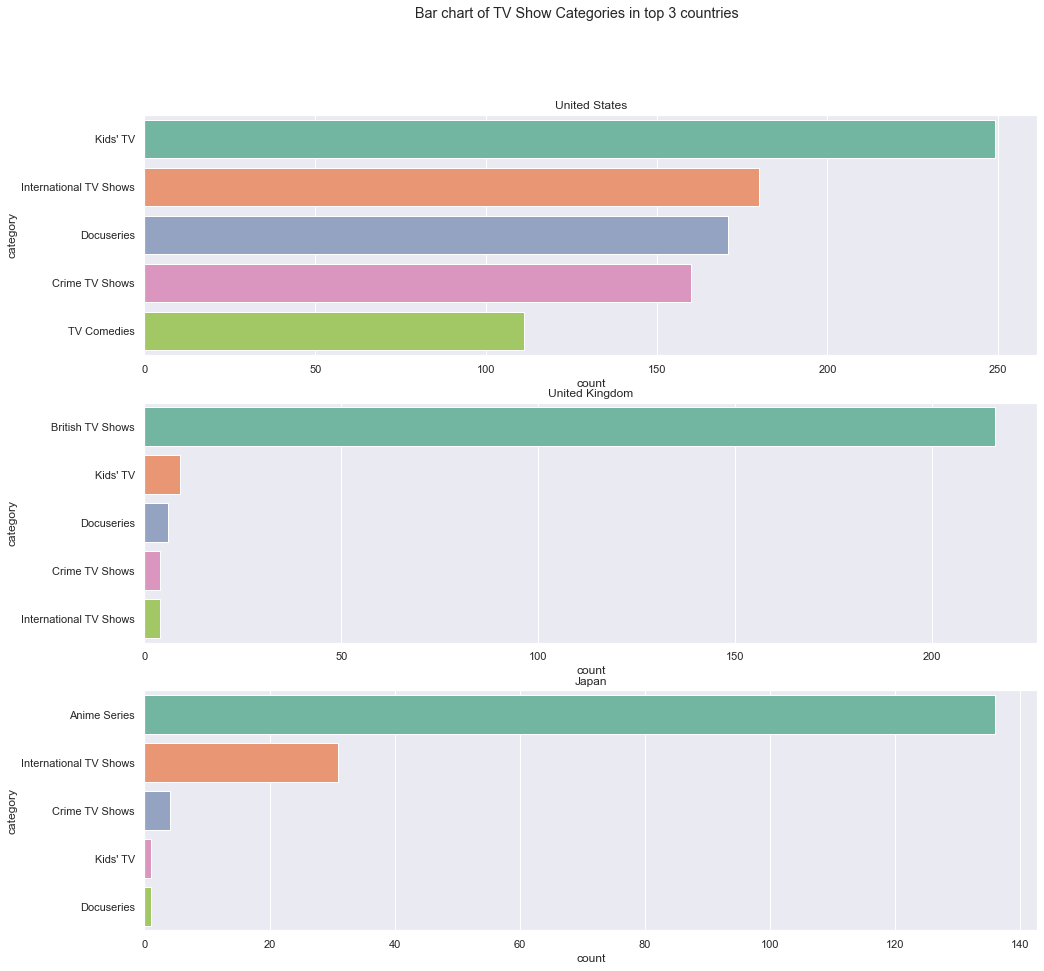

In [43]:
fig, axes = plt.subplots(3, 1, figsize = (16,15))
fig.suptitle('Bar chart of TV Show Categories in top 3 countries')

datau = data[(data.type == 'TV Show')]

# United States
sns.countplot(ax = axes[0], y = 'category', data = datau[data.country_main == 'United States'], 
              order=datau[data.country_main == 'United States'].category.value_counts().index[0:5], palette="Set2")
axes[0].set_title('United States')

# United Kingdom
sns.countplot(ax = axes[1], y = 'category', data = datau[data.country_main == 'United Kingdom'], 
              order=datau[data.country_main == 'United Kingdom'].category.value_counts().index[0:5], palette="Set2")
axes[1].set_title('United Kingdom')

# Japan 
sns.countplot(ax = axes[2], y = 'category', data = datau[data.country_main == 'Japan'], 
              order=datau[data.country_main == 'Japan'].category.value_counts().index[0:5], palette="Set2")
axes[2].set_title('Japan')

plt.show()

As we can see, the United States TV Shows have similar quantity, but both of United Kingdom and Japan have the one largest number of TV Show that many more than others in each countries: British TV Shows in United Kingdom, and Anime Series in Japan.

### 3.7 Actor/Actress

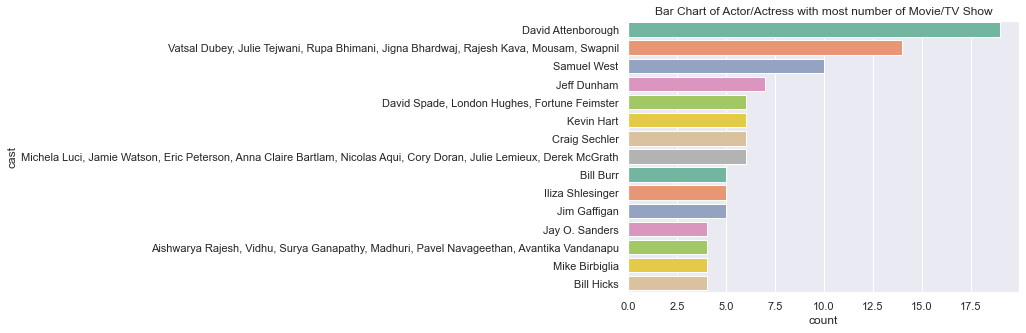

In [44]:
plt.figure(figsize=(7,5))
sns.color_palette("flare", as_cmap=True)
sns.countplot(y = 'cast', data = data, 
              order=data.cast.value_counts().index[0:15], palette="Set2")
plt.title('Bar Chart of Actor/Actress with most number of Movie/TV Show')

plt.show()

**David Altenborough** has highest number of Movies/TV Shows on Netflix.

### 3.8 Director

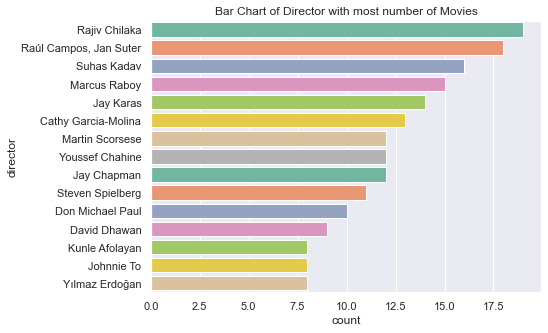

In [45]:
# Movie
plt.figure(figsize=(7,5))
sns.countplot(y = 'director', data = data[data.type=='Movie'], 
              order=data[data.type=='Movie'].director.value_counts().index[0:15], palette="Set2")
plt.title('Bar Chart of Director with most number of Movies')
plt.show()

**Rajiv Chilaka** produced highest number of Movies on Netflix.

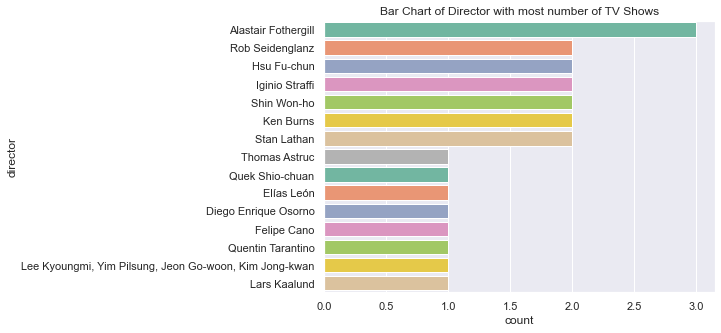

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(y = 'director', data = data[data.type=='TV Show'], 
              order=data[data.type=='TV Show'].director.value_counts().index[0:15], palette="Set2")
plt.title('Bar Chart of Director with most number of TV Shows')
plt.show()

**Alastair Fothergill** produced highest number of TV Show on Netflix.